In [51]:
# 이진분류.. 영화리뷰

In [52]:
from tensorflow.keras.datasets import imdb

In [53]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)

In [54]:
# 리뷰를 텍스트로 디코딩

In [55]:
import tensorflow as tf

In [56]:
word_index = imdb.get_word_index()

In [57]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]    
)

In [58]:
decoded_review = " ".join(
    reverse_word_index.get(i-3,"?") for i in x_train[0]
)

In [59]:
# 데이터 준비
# 숫자를 멀티 - 핫 인코딩
import numpy as np
from tensorflow.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)
def vectorize_sequences(sequences,dimension = 1000):
    results = np.zeros((len(sequences),dimension ))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)    

In [60]:
temp = [
    [1,2],
    [3,4]
]
temp = np.array(temp)
temp.shape

(2, 2)

In [61]:
vectorize_sequences(temp,5)

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [65]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32') 

In [66]:
# 신경망 모델

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [69]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [71]:
#훈련데이터를 학습용 과 검증용
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,random_state=32)

In [74]:
x_tr.shape, x_val.shape

((18750, 1000), (6250, 1000))

In [75]:
# 모델 훈련

In [76]:
hist = model.fit(x_tr,y_tr,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
37/37 [==============================] - 1s 13ms/step - loss: 0.6212 - acc: 0.6913 - val_loss: 0.5090 - val_acc: 0.7906
Epoch 2/20
37/37 [==============================] - 0s 6ms/step - loss: 0.4322 - acc: 0.8259 - val_loss: 0.3735 - val_acc: 0.8426
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.3454 - acc: 0.8564 - val_loss: 0.3369 - val_acc: 0.8566
Epoch 4/20
37/37 [==============================] - 0s 5ms/step - loss: 0.3168 - acc: 0.8695 - val_loss: 0.3337 - val_acc: 0.8579
Epoch 5/20
37/37 [==============================] - 0s 6ms/step - loss: 0.3046 - acc: 0.8763 - val_loss: 0.3302 - val_acc: 0.8600
Epoch 6/20
37/37 [==============================] - 0s 6ms/step - loss: 0.2983 - acc: 0.8777 - val_loss: 0.3307 - val_acc: 0.8587
Epoch 7/20
37/37 [==============================] - 0s 6ms/step - loss: 0.2953 - acc: 0.8796 - val_loss: 0.3330 - val_acc: 0.8587
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 0.2919 - acc: 0.8

In [77]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

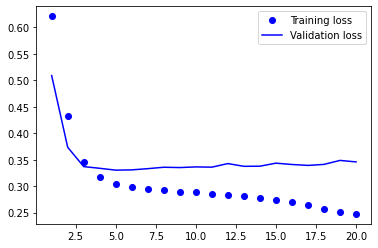

In [78]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.legend()
plt.show()

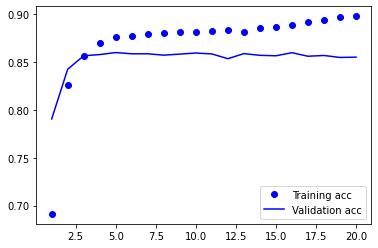

In [79]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training acc")
plt.plot(epochs, val_loss_values,"b", label="Validation acc")
plt.legend()
plt.show()

In [80]:
# 예측
model.predict(x_test)

782/782 [==============================] - 1s 951us/step


array([[0.09380347],
       [0.9974527 ],
       [0.6163818 ],
       ...,
       [0.05737863],
       [0.22984079],
       [0.17025265]], dtype=float32)

In [82]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3454 - acc: 0.8530


[0.34541022777557373, 0.8530399799346924]

In [164]:
# 다중분류
from tensorflow.keras.datasets import reuters

In [165]:
(x_train,y_train),(x_test,y_test)= reuters.load_data(num_words=10000)

In [166]:
len(x_train)

8982

In [167]:
x_train = vectorize_sequences(x_train,10000)
x_test = vectorize_sequences(x_test,10000)

In [168]:
# 레이블 인코딩

In [169]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [170]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8982, 10000), (2246, 10000), (8982,), (2246,))

In [186]:
# 모델 정의
model = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46,activation='softmax')
])

In [187]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [188]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [189]:
hist = model.fit(x_tr,y_tr,epochs=30,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/30
53/53 [==============================] - 2s 19ms/step - loss: 2.9785 - accuracy: 0.2862 - val_loss: 1.8268 - val_accuracy: 0.5454
Epoch 2/30
53/53 [==============================] - 1s 19ms/step - loss: 1.9246 - accuracy: 0.5129 - val_loss: 1.5034 - val_accuracy: 0.6309
Epoch 3/30
53/53 [==============================] - 1s 19ms/step - loss: 1.6002 - accuracy: 0.5984 - val_loss: 1.3450 - val_accuracy: 0.7155
Epoch 4/30
53/53 [==============================] - 1s 21ms/step - loss: 1.3950 - accuracy: 0.6577 - val_loss: 1.2816 - val_accuracy: 0.7173
Epoch 5/30
53/53 [==============================] - 1s 21ms/step - loss: 1.2417 - accuracy: 0.6914 - val_loss: 1.2398 - val_accuracy: 0.7208
Epoch 6/30
53/53 [==============================] - 1s 21ms/step - loss: 1.1351 - accuracy: 0.7132 - val_loss: 1.2406 - val_accuracy: 0.7222
Epoch 7/30
53/53 [==============================] - 1s 19ms/step - loss: 1.0512 - accuracy: 0.7297 - val_loss: 1.2483 - val_accuracy: 0.7337
Epoch 8/30
53

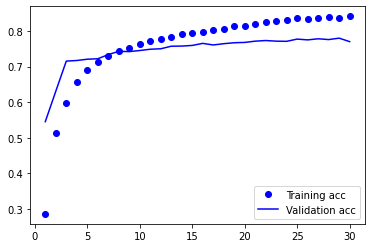

In [190]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training acc")
plt.plot(epochs, val_loss_values,"b", label="Validation acc")
plt.legend()
plt.show()

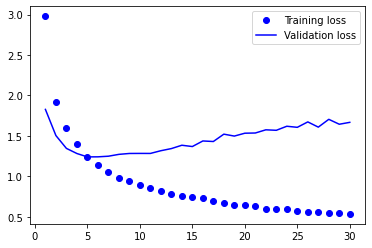

In [191]:

history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.legend()
plt.show()

In [192]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.7800 - accuracy: 0.7614


[1.7799707651138306, 0.7613534927368164]

In [193]:
# 보스턴 주택 가격
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [194]:
train_data.shape

(404, 13)

In [198]:
# 데이터 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [201]:
# 모델정의
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse', metrics=['mae'])
    return model

In [203]:
# k-겹 검증 
k = 4
num_val_samples =  len(train_data) // k
num_epochs = []
all_scores = []

In [ ]:
for i in range(k):
    pass